In [1]:
import numpy as np
import tensorflow as tf

# Define the input matrix (5x5)
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

# Define the kernel (3x3)
kernel = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Reshape input and kernel for TensorFlow convolution
input_tensor = tf.reshape(tf.constant(input_matrix, dtype=tf.float32), [1, 5, 5, 1])
kernel_tensor = tf.reshape(tf.constant(kernel, dtype=tf.float32), [3, 3, 1, 1])

# Perform convolution with Stride = 1, Padding = 'VALID'
conv_valid_stride1 = tf.nn.conv2d(
    input_tensor,
    kernel_tensor,
    strides=[1, 1, 1, 1],
    padding='VALID'
)

# Perform convolution with Stride = 1, Padding = 'SAME'
conv_same_stride1 = tf.nn.conv2d(
    input_tensor,
    kernel_tensor,
    strides=[1, 1, 1, 1],
    padding='SAME'
)

# Perform convolution with Stride = 2, Padding = 'VALID'
conv_valid_stride2 = tf.nn.conv2d(
    input_tensor,
    kernel_tensor,
    strides=[1, 2, 2, 1],
    padding='VALID'
)

# Perform convolution with Stride = 2, Padding = 'SAME'
conv_same_stride2 = tf.nn.conv2d(
    input_tensor,
    kernel_tensor,
    strides=[1, 2, 2, 1],
    padding='SAME'
)

# Print the output feature maps
print("Output feature map for Stride = 1, Padding = 'VALID':")
print(tf.squeeze(conv_valid_stride1).numpy())
print("\nOutput feature map for Stride = 1, Padding = 'SAME':")
print(tf.squeeze(conv_same_stride1).numpy())
print("\nOutput feature map for Stride = 2, Padding = 'VALID':")
print(tf.squeeze(conv_valid_stride2).numpy())
print("\nOutput feature map for Stride = 2, Padding = 'SAME':")
print(tf.squeeze(conv_same_stride2).numpy())

Output feature map for Stride = 1, Padding = 'VALID':
[[411. 456. 501.]
 [636. 681. 726.]
 [861. 906. 951.]]

Output feature map for Stride = 1, Padding = 'SAME':
[[128. 202. 241. 280. 184.]
 [276. 411. 456. 501. 318.]
 [441. 636. 681. 726. 453.]
 [606. 861. 906. 951. 588.]
 [320. 436. 457. 478. 280.]]

Output feature map for Stride = 2, Padding = 'VALID':
[[411. 501.]
 [861. 951.]]

Output feature map for Stride = 2, Padding = 'SAME':
[[128. 241. 184.]
 [441. 681. 453.]
 [320. 457. 280.]]


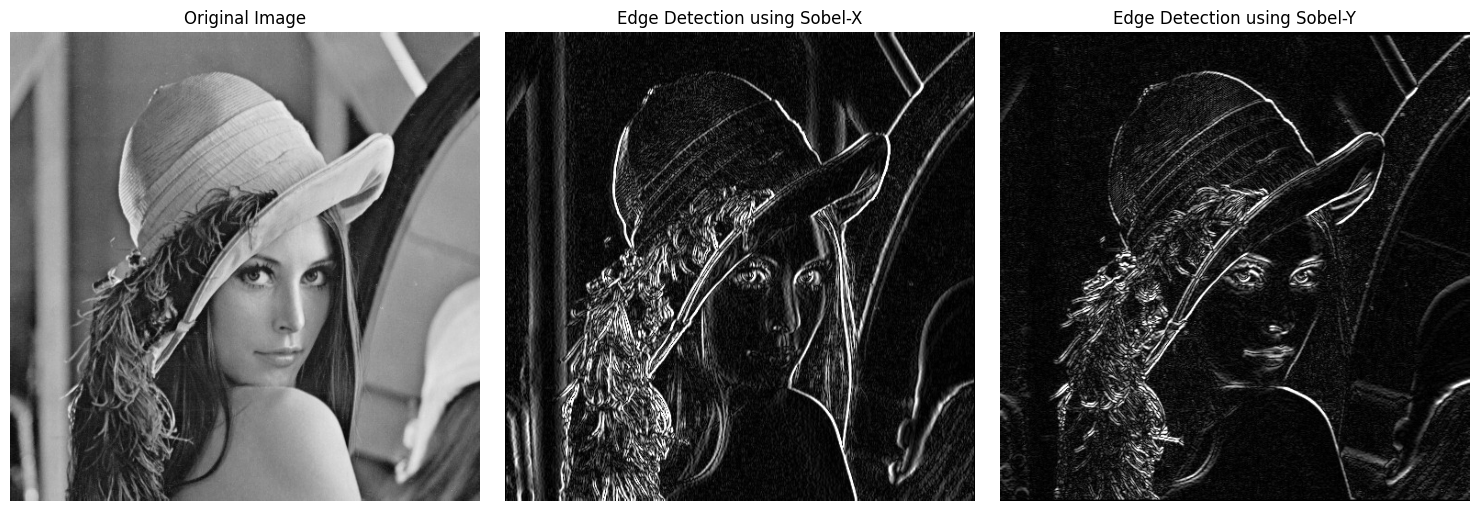

Task 1: Edge Detection using Sobel Filter completed.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

# Function to download and load a sample image
def load_sample_image():
    # URL of a sample image (you can replace with your own image path)
    url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
    img = cv2.imdecode(np.asarray(bytearray(urlopen(url).read()), dtype=np.uint8), cv2.IMREAD_GRAYSCALE)
    return img

# Load a grayscale image
image = load_sample_image()

# Apply the Sobel filter for edge detection in the x-direction
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
# Convert to absolute values and then to uint8 for display
sobel_x_abs = cv2.convertScaleAbs(sobel_x)

# Apply the Sobel filter for edge detection in the y-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
# Convert to absolute values and then to uint8 for display
sobel_y_abs = cv2.convertScaleAbs(sobel_y)

# Display the original image and the filtered images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Edge Detection using Sobel-X')
plt.imshow(sobel_x_abs, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Edge Detection using Sobel-Y')
plt.imshow(sobel_y_abs, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Task 1: Edge Detection using Sobel Filter completed.")

In [3]:
import numpy as np
import tensorflow as tf

# Create a random 4x4 matrix as an input image
np.random.seed(42)  # For reproducibility
input_matrix = np.random.rand(4, 4)

# Reshape the input matrix for TensorFlow operations
input_tensor = tf.reshape(tf.constant(input_matrix, dtype=tf.float32), [1, 4, 4, 1])

# Apply a 2x2 Max Pooling operation
max_pooled = tf.nn.max_pool2d(
    input_tensor,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='VALID'
)

# Apply a 2x2 Average Pooling operation
avg_pooled = tf.nn.avg_pool2d(
    input_tensor,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='VALID'
)

# Print the original matrix, max-pooled matrix, and average-pooled matrix
print("Original Matrix:")
print(input_matrix)
print("\nMax Pooled Matrix:")
print(tf.squeeze(max_pooled).numpy())
print("\nAverage Pooled Matrix:")
print(tf.squeeze(avg_pooled).numpy())

print("\nTask 2: Pooling Operations on Random 4×4 Matrix completed.")

Original Matrix:
[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]]

Max Pooled Matrix:
[[0.9507143  0.8661761 ]
 [0.83244264 0.96990985]]

Average Pooled Matrix:
[[0.4093169  0.5637281 ]
 [0.58849233 0.33893096]]

Task 2: Pooling Operations on Random 4×4 Matrix completed.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the AlexNet model
def create_alexnet():
    model = Sequential([
        # First Convolutional Layer
        Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu',
               input_shape=(227, 227, 3), padding='valid'),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        # Second Convolutional Layer
        Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        # Third Convolutional Layer
        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),

        # Fourth Convolutional Layer
        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),

        # Fifth Convolutional Layer
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        # Flatten Layer
        Flatten(),

        # First Fully Connected Layer
        Dense(4096, activation='relu'),
        Dropout(0.5),

        # Second Fully Connected Layer
        Dense(4096, activation='relu'),
        Dropout(0.5),

        # Output Layer
        Dense(10, activation='softmax')
    ])

    return model

# Create and print the AlexNet model summary
alexnet_model = create_alexnet()
print("AlexNet Model Summary:")
alexnet_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AlexNet Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Add, Activation, Flatten, Dense

# Define a residual block function
def residual_block(input_tensor, filters):
    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)

    # Skip connection (add the input to the output)
    x = Add()([x, input_tensor])

    # Apply activation after the addition
    x = Activation('relu')(x)

    return x

# Create a simple ResNet-like model
def create_resnet():
    # Input layer
    input_tensor = Input(shape=(224, 224, 3))

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=2, padding='same', activation='relu')(input_tensor)

    # Apply two residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    # Flatten layer
    x = Flatten()(x)

    # Dense layer
    x = Dense(128, activation='relu')(x)

    # Output layer
    output = Dense(10, activation='softmax')(x)

    # Create the model
    model = Model(inputs=input_tensor, outputs=output)

    return model

# Create and print the ResNet model summary
resnet_model = create_resnet()
print("\nResNet-like Model Summary:")
resnet_model.summary()


ResNet-like Model Summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 112, 112, 64)   │          9,472 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 112, 112, 64)   │         36,928 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 112, 112, 64)   │         36,928 │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 112, 112, 64)   │              0 │ conv2d_12[0][0],       │
│                           │                        │                │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 112, 112, 64)   │              0 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 112, 112, 64)   │         36,928 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 112, 112, 64)   │         36,928 │ conv2d_13[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 112, 112, 64)   │              0 │ conv2d_14[0][0],       │
│                           │                        │                │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 112, 112, 64)   │              0 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 802816)         │              0 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 128)            │    102,760,576 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 10)             │          1,290 │ dense_5[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 102,919,050 (392.61 MB)

 Trainable params: 102,919,050 (392.61 MB)

 Non-trainable params: 0 (0.00 B)